In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Displacements due to drought

### Regression coefficients

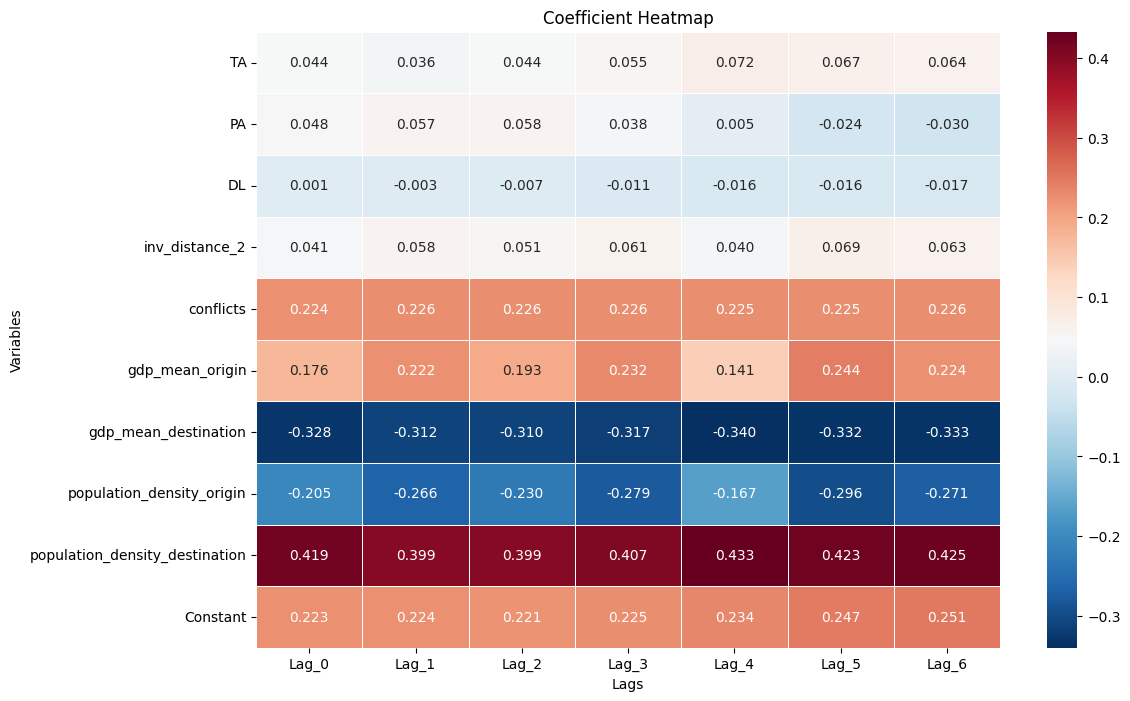

In [2]:
# Creating a dictionary with the coefficients and standard errors
data = {
    'Variable': ['TA', 'PA', 'DL', 'inv_distance_2', 'conflicts', 'gdp_mean_origin', 'gdp_mean_destination',
                 'population_density_origin', 'population_density_destination', 'Constant'],
    'Lag_0': [0.044, 0.048, 0.001, 0.041, 0.224, 0.176, -0.328, -0.205, 0.419, 0.223],
    'Lag_1': [0.036, 0.057, -0.003, 0.058, 0.226, 0.222, -0.312, -0.266, 0.399, 0.224],
    'Lag_2': [0.044, 0.058, -0.007, 0.051, 0.226, 0.193, -0.310, -0.230, 0.399, 0.221],
    'Lag_3': [0.055, 0.038, -0.011, 0.061, 0.226, 0.232, -0.317, -0.279, 0.407, 0.225],
    'Lag_4': [0.072, 0.005, -0.016, 0.040, 0.225, 0.141, -0.340, -0.167, 0.433, 0.234],
    'Lag_5': [0.067, -0.024, -0.016, 0.069, 0.225, 0.244, -0.332, -0.296, 0.423, 0.247],
    'Lag_6': [0.064, -0.030, -0.017, 0.063, 0.226, 0.224, -0.333, -0.271, 0.425, 0.251]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Reshaping the DataFrame for heatmap
heatmap_data = df.set_index('Variable')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap= 'RdBu_r', annot=True, fmt=".3f", linewidths=.5)
plt.title('Coefficient Heatmap')
plt.ylabel('Variables')
plt.xlabel('Lags')
plt.show()


### All years, new

In [23]:
df

,Unnamed: 0,lm.coefficients,lm_lag1.coefficients,lm_lag2.coefficients,lm_lag3.coefficients,lm_lag4.coefficients,lm_lag5.coefficients,lm_lag6.coefficients
0,TA_dep,0.477559,0.392224,0.478708,0.607011,0.795798,0.750174,0.716098
1,PA_dep,0.528568,0.603306,0.613277,0.379173,0.036465,-0.293080,-0.346716
2,DL_dep,0.010112,-0.022727,-0.070541,-0.117021,-0.172224,-0.181994,-0.182472
3,conflicts_dep,0.450280,0.455035,0.437603,0.428071,0.433057,0.457774,0.450134
4,inv_distance_2,2.458973,2.476250,2.474190,2.471580,2.464908,2.466460,2.469317
5,gdp_mean_dep,1.928355,1.829287,1.689641,1.603167,1.556606,1.622662,1.596562
6,gdp_mean_arr,-3.598541,-3.505863,-3.488098,-3.599095,-3.747499,-3.762737,-3.743503
7,population_density_dep,-2.253728,-2.148920,-1.984646,-1.886897,-1.841213,-1.931225,-1.899063
8,population_density_arr,4.596309,4.485109,4.472534,4.602784,4.772406,4.785935,4.764303
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of observations: 3630


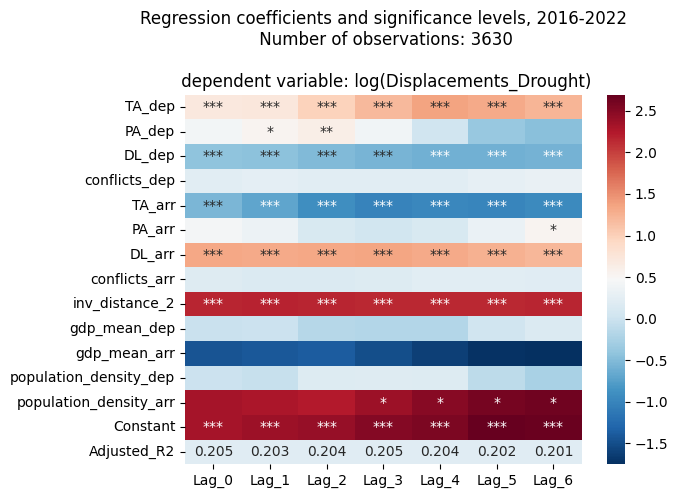

In [24]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

Number of observations: 1199


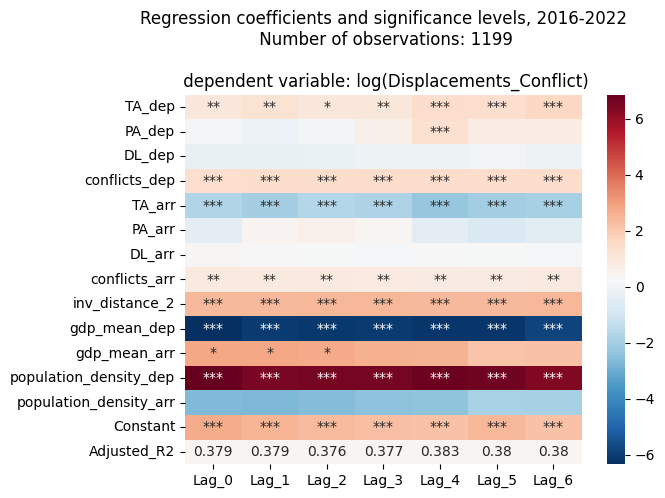

In [19]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new_confl.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_confl.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Conflict)')
plt.savefig("regr_coef_confl_all_new.pdf", bbox_inches='tight')
plt.show()

### All years

Number of observations: 3630


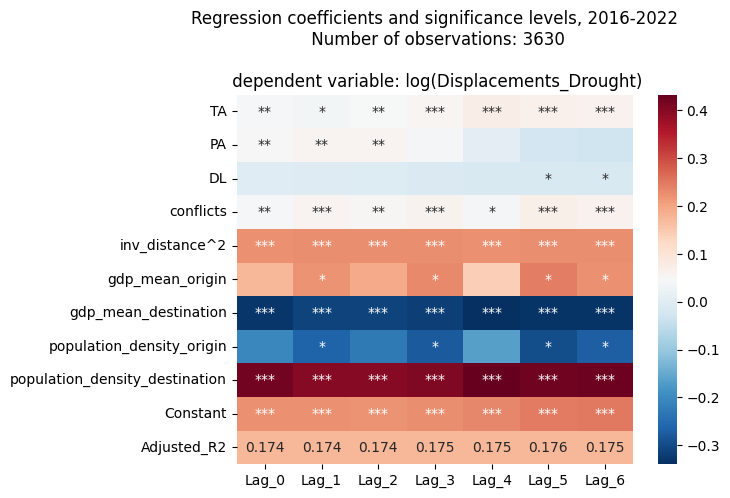

In [10]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
#plt.savefig("regression_coefficients_drought_all.pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 453


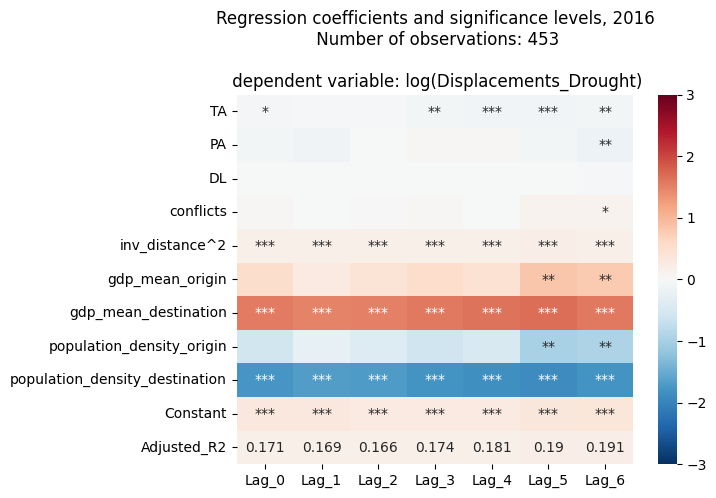

Number of observations: 659


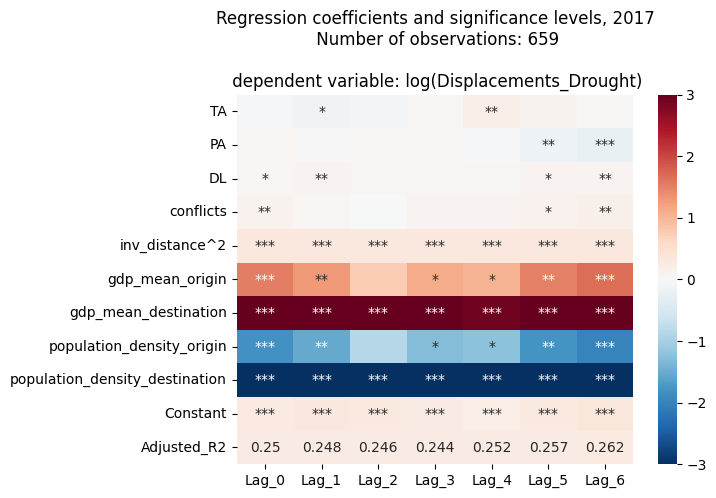

Number of observations: 663


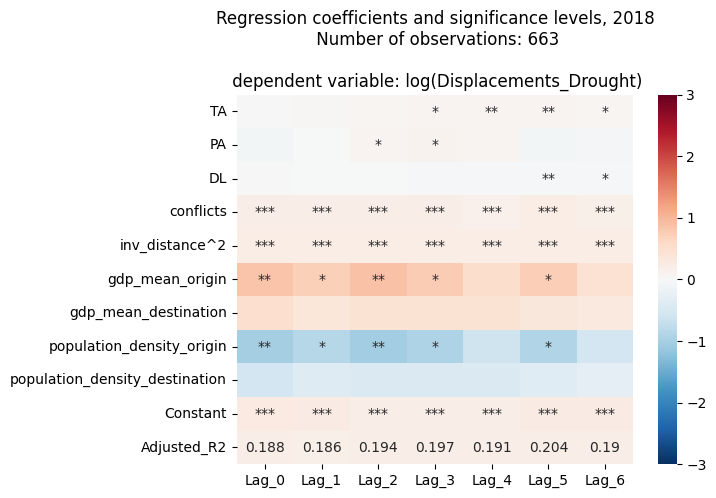

Number of observations: 537


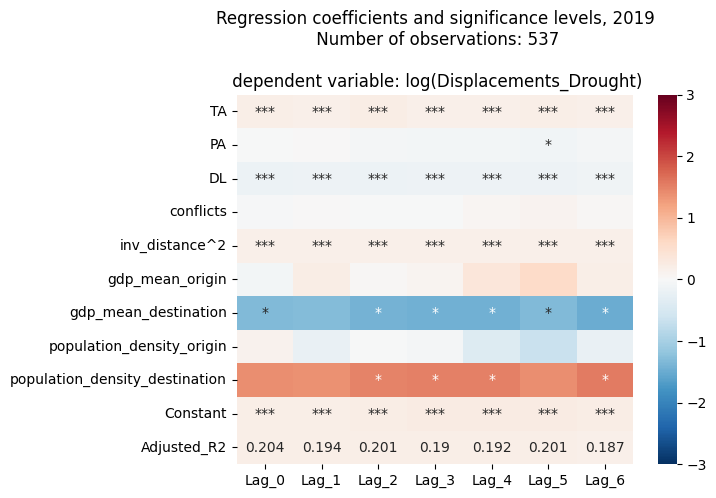

Number of observations: 433


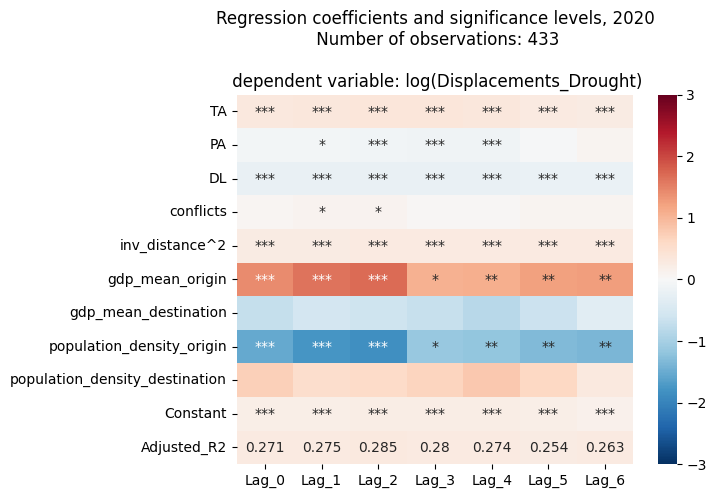

Number of observations: 444


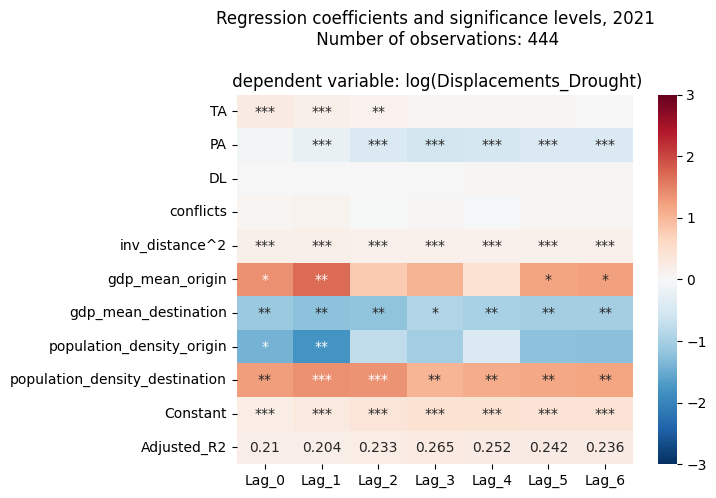

Number of observations: 441


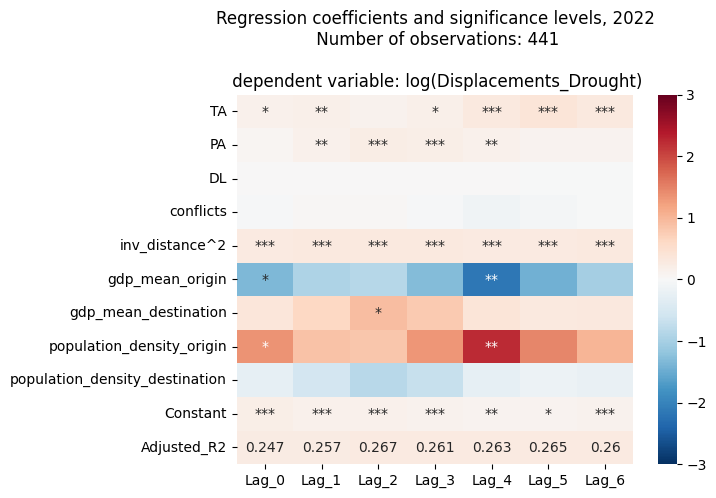

In [ ]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_"+str(f)+r"_c.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_r_"+str(f)+r".csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_p_"+str(f)+r".csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Drought)')
    plt.savefig("regression_coefficients_drought_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()

## Displacements due to conflict

### All years

Number of observations: 1199


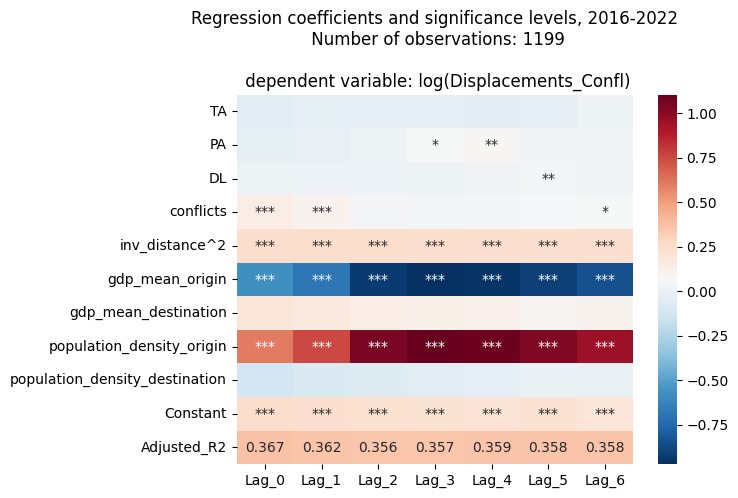

In [ ]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_all_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_r_all_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_p_all_confl.csv")
nobs_c = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_obs_confl.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs_c.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs_c.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Confl)')
plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 130


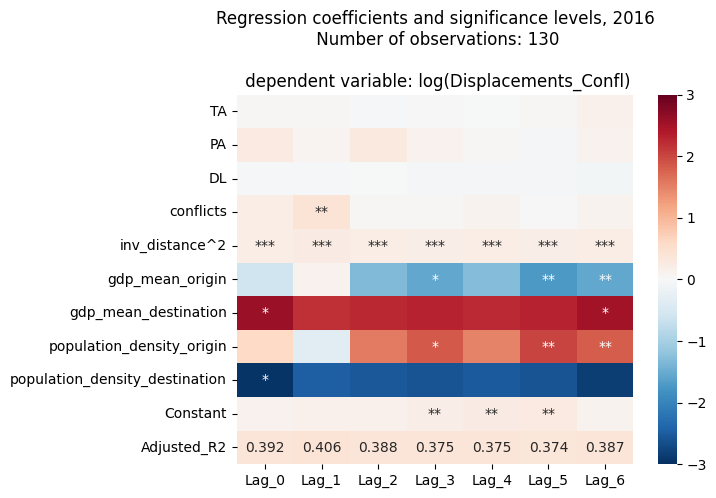

Number of observations: 121


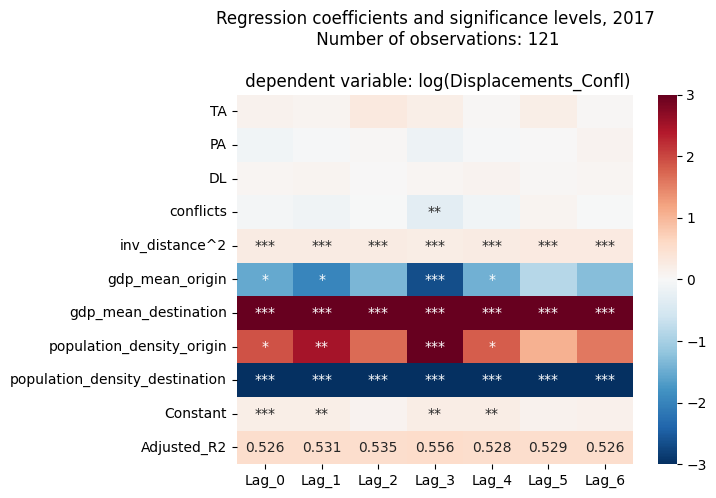

Number of observations: 240


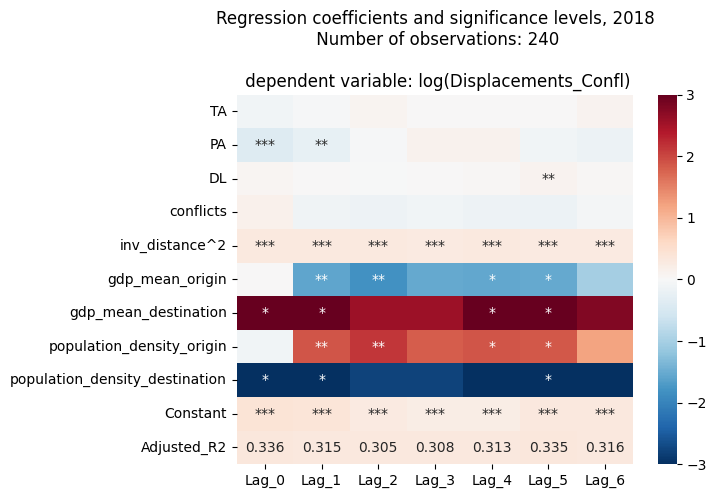

Number of observations: 218


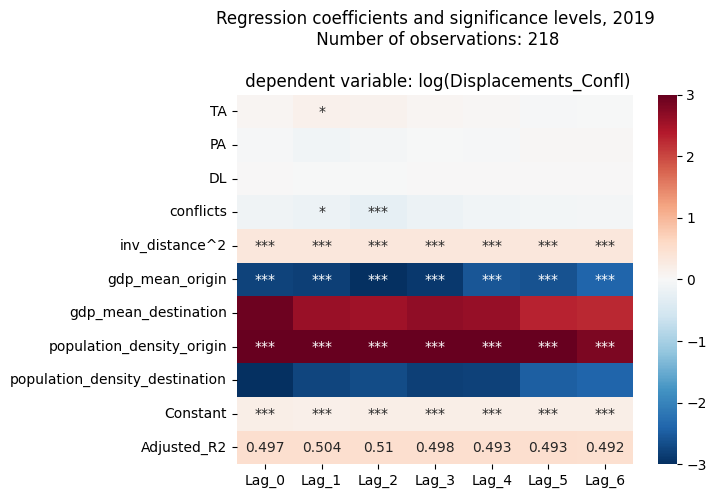

Number of observations: 188


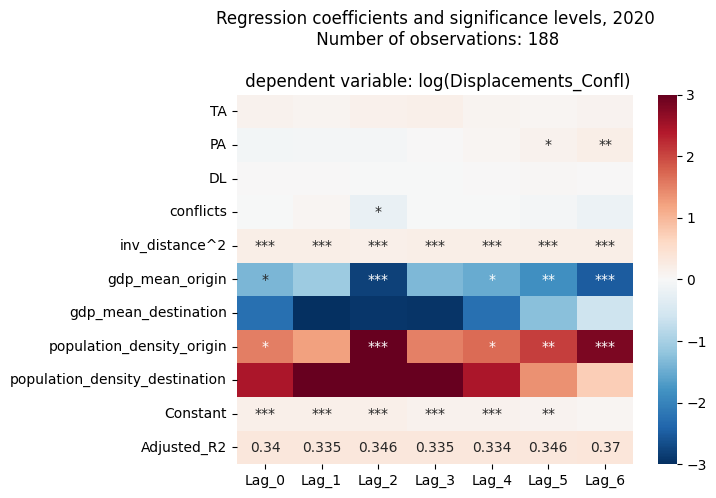

Number of observations: 169


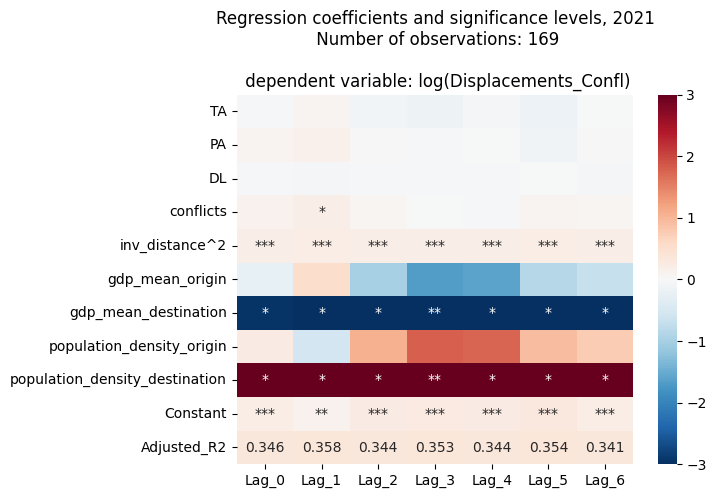

Number of observations: 133


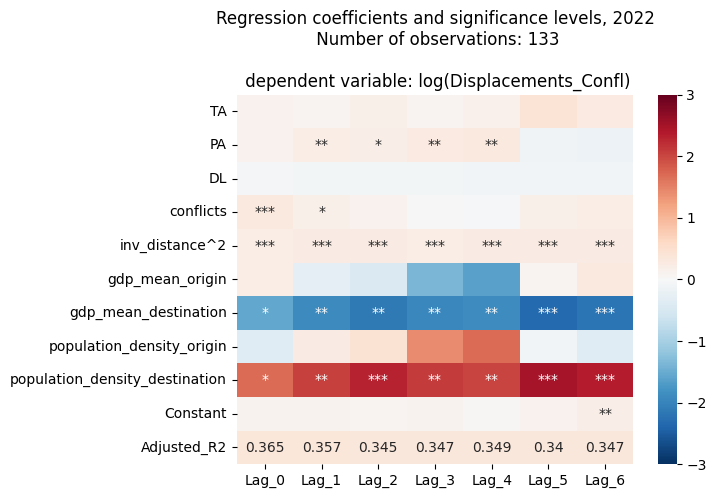

In [ ]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_"+str(f)+r"_c_confl.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_r_"+str(f)+r"_confl.csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/lm_p_"+str(f)+r"_confl.csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs_c.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs_c.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Confl)')
    plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()